In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

iris_grouped_df = iris_df.groupby('target').mean().round(1)

condition_list = [iris_grouped_df.index == 0,iris_grouped_df.index == 1,iris_grouped_df.index == 2]
choice_list = ['setosa' , 'versicolor', 'virginica']
iris_grouped_df['target_name'] = np.select(condition_list, choice_list, default='unknown')
iris_grouped_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
target,,,,,
0.0,5.0,3.4,1.5,0.2,setosa
1.0,5.9,2.8,4.3,1.3,versicolor
2.0,6.6,3.0,5.6,2.0,virginica


**Matplotlib Chart and Table in PDF example**

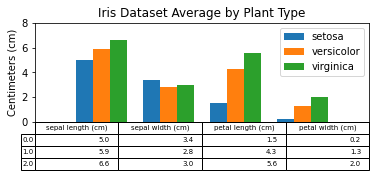

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table

ax = plt.subplot(211)
plt.title("Iris Dataset Average by Plant Type")
plt.ylabel('Centimeters (cm)')

ticks = [4,8,12,16]
a = [x - 1 for x in ticks]
b = [x + 1 for x in ticks]

plt.xticks([])

plt.bar(a, iris_grouped_df.loc[0].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[0].values.tolist()[-1:]))
plt.bar(ticks, iris_grouped_df.loc[1].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[1].values.tolist()[-1:]))
plt.bar(b, iris_grouped_df.loc[2].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[2].values.tolist()[-1:]))

plt.legend()
plt.axis([0, 20, 0, 8])

table(ax, iris_grouped_df.drop(['target_name'], axis=1), loc='bottom')
plt.savefig('iris_grouped_df.pdf')
